In [1]:
import numpy as np
np.random.seed(88889999)
import graspy
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

In [40]:
from tqdm import tqdm
def get_power(n=50, iters=100):
    #ns = [n, n]
    #p1 = np.array([[.9,.1],[.1,.9]])
    #p2 = np.array([[.9,.4],[.4,.9]]) #or .4 on off-diagonals for power -> 1
    #A1 = sbm(ns,p1)
    #A2 = sbm(ns,p2)
    #X1 = AdjacencySpectralEmbed().fit_transform(A1)
    #X2 = AdjacencySpectralEmbed().fit_transform(A2)
    X1 = np.random.uniform(0.2,0.7,n).reshape(-1,1)
    X2 = np.random.uniform(0.2,0.7,n).reshape(-1,1)
    #X2 = np.random.uniform(0.4,0.9,n).reshape(-1,1)
    A1 = rdpg(X1,
          loops=False,
          rescale=False,
          directed=False)
    A2 = rdpg(X2,
          loops=False,
          rescale=False,
          directed=False)
    npt = graspy.inference.NonparametricTest()
    p = npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - 0.05)*200))) #200 is n_bootstraps, 0.05 is alpha
    critical_value = sorted_[rej_ind]
    rejections = 0
    for i in range(iters):
        #A = sbm(ns,p1)
        #B = sbm(ns,p2)
        A = rdpg(X1,
          loops=False,
          rescale=False,
          directed=False)
        B = rdpg(X2,
          loops=False,
          rescale=False,
          directed=False)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters

In [41]:
pows = []
x = range(10,101,5)
allx = []
for _ in range(10):
    xs = []
    for n in tqdm(x):
        xs.append(get_power(n))
    pows.append(xs)

  0%|          | 0/19 [00:00<?, ?it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input gra

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 11%|█         | 2/19 [00:02<00:18,  1.10s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 21%|██        | 4/19 [00:05<00:19,  1.28s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

  0%|          | 0/19 [00:00<?, ?it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input gra

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 26%|██▋       | 5/19 [00:09<00:27,  1.95s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 32%|███▏      | 6/19 [00:12<00:31,  2.45s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 84%|████████▍ | 16/19 [00:44<00:10,  3.46s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
  0%|          | 0/19 [00:00<?, ?it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
  5%|▌         | 1/19 [00:01<00:26,  1.46s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:13<00:23,  1.92s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

 53%|█████▎    | 10/19 [00:20<00:20,  2.25s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 58%|█████▊    | 11/19 [00:23<00:18,  2.33s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_desig

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

  5%|▌         | 1/19 [00:00<00:13,  1.34it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 26%|██▋       | 5/19 [00:05<00:14,  1.05s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:08<00:15,  1.33s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 53%|█████▎    | 10/19 [00:14<00:17,  1.91s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: 

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
  5%|▌         | 1/19 [00:00<00:16,  1.08it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 11%|█         | 2/19 [00:01<00:15,  1.07it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

  5%|▌         | 1/19 [00:00<00:14,  1.27it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:08<00:16,  1.37s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

  5%|▌         | 1/19 [00:00<00:14,  1.26it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 21%|██        | 4/19 [00:03<00:14,  1.00it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:08<00:15,  1.32s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 16%|█▌        | 3/19 [00:03<00:19,  1.21s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:11<00:20,  1.74s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 63%|██████▎   | 12/19 [00:22<00:16,  2.38s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: 

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 11%|█         | 2/19 [00:01<00:15,  1.08it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
 37%|███▋      | 7/19 [00:10<00:20,  1.68s/it]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

  5%|▌         | 1/19 [00:00<00:13,  1.29it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

 21%|██        | 4/19 [00:03<00:14,  1.00it/s]/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: I

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspy.utils.get_lcc``.
  warnings.warn(msg, UserWarning)
/Users/bijanvarjavand/Documents/spring19/neuro_data_design/graspy/graspy/embed/ase.py:124: UserWarning: Input graph is not fully connected. Results may

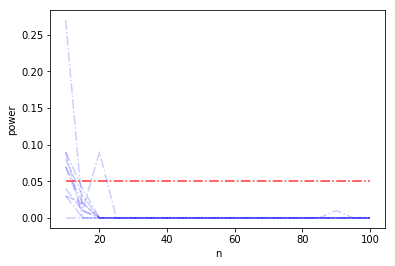

In [42]:
import matplotlib.pyplot as plt
#plt.plot(x,pows)
for i in range(10):
    plt.plot(x, pows[i], 'b-.', alpha=0.2)
    #plt.plot(x, np.array(allx)[:,i], 'b-.', alpha=0.2)
plt.plot(x,[0.05]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
plt.savefig('power_curve_test_alt.png')
plt.show()

import mgcpy